In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

A.

In [2]:
# Step 1: Import Required Libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 2: Load the 20 Newsgroups Dataset

# Fetch the dataset (training subset)
newsgroups = fetch_20newsgroups(subset='train')
texts = newsgroups.data  # List of documents (text data)

# Step 3: Preprocess the Text Data using TF-IDF
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the text data into a TF-IDF matrix
X_tfidf = vectorizer.fit_transform(texts)

# Step 4: Convert the TF-IDF Matrix to a Readable Format
# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix (X_tfidf) to a dense format and create a DataFrame for readability
tfidf_dataframe = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# Print the shape of the resulting TF-IDF matrix
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")  # Shape: (number of documents, number of words)

# Print a sample of the TF-IDF values for the first document
print("Sample TF-IDF Values for the First Document:")
print(tfidf_dataframe.iloc[0])



TF-IDF Matrix Shape: (11314, 1000)
Sample TF-IDF Values for the First Document:
00       0.000000
000      0.000000
01       0.000000
02       0.000000
03       0.000000
           ...   
year     0.000000
years    0.116702
yes      0.000000
york     0.000000
young    0.000000
Name: 0, Length: 1000, dtype: float64


B.

In [8]:
pip install gensim glove-python-binary nltk


ERROR: Could not find a version that satisfies the requirement glove-python-binary (from versions: none)
ERROR: No matching distribution found for glove-python-binary
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Word2Vec Vectors:
[-8.6262161e-03  3.6676857e-03  5.1897005e-03  5.7403930e-03
  7.4670343e-03 -6.1687236e-03  1.1074917e-03  6.0505634e-03
 -2.8436291e-03 -6.1759176e-03 -4.1308792e-04 -8.3711352e-03
 -5.6054387e-03  7.1041607e-03  3.3517056e-03  7.2244392e-03
  6.7998110e-03  7.5323791e-03 -3.7897949e-03 -5.6347065e-04
  2.3465536e-03 -4.5222640e-03  8.3951559e-03 -9.8568993e-03
  6.7639216e-03  2.9143358e-03 -4.9331919e-03  4.3977192e-03
 -1.7413623e-03  6.7153927e-03  9.9708298e-03 -4.3658707e-03
 -6.0062943e-04 -5.7015759e-03  3.8536517e-03  2.7889381e-03
  6.8942583e-03  6.1050751e-03  9.5426226e-03  9.2754345e-03
  7.9035610e-03 -6.9950884e-03 -9.1626327e-03 -3.5472261e-04
 -3.0997358e-03  7.8942776e-03  5.9408071e-03 -1.5438469e-03
  1.5121460e-03  1.7886562e-03  7.8214668e-03 -9.5145693e-03
 -2.0126738e-04  3.4718481e-03 -9.4237033e-04  8.3834762e-03
  9.0144100e

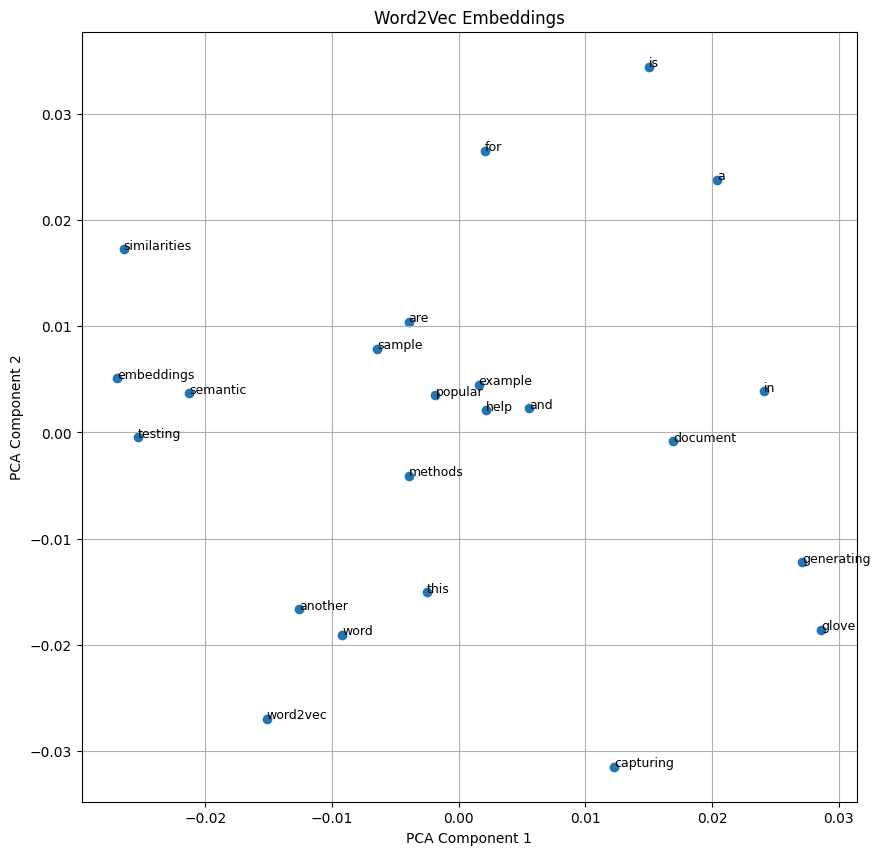

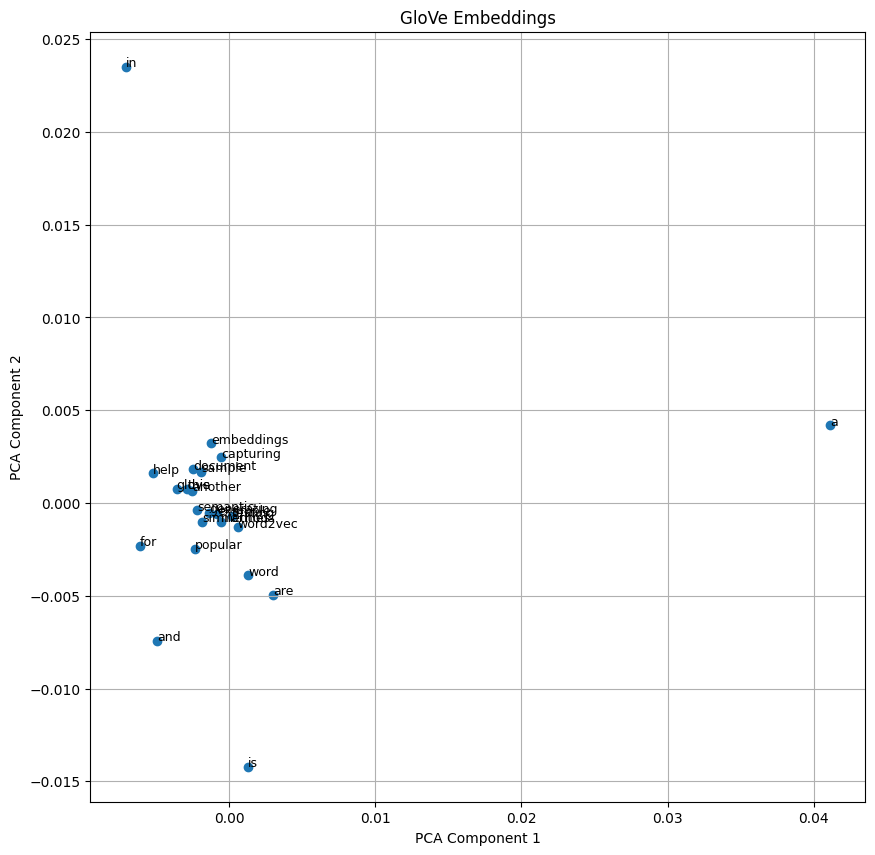

In [9]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ensure you download the NLTK tokenizer
nltk.download('punkt')

# Step 1: Load and preprocess the dataset
# Load a sample text corpus (replace with your own text file path)
# For this example, we'll use a small set of sentences
sample_text = [
    "This is a sample document.",
    "Another example document for testing.",
    "Word embeddings help in capturing semantic similarities.",
    "GloVe and Word2Vec are popular methods for generating embeddings."
]

# Preprocessing function
def preprocess_text(text):
    # Tokenize and lower case
    return [word.lower() for word in word_tokenize(text) if word.isalnum()]

# Preprocess the entire corpus
tokenized_corpus = [preprocess_text(sentence) for sentence in sample_text]

# Step 2: Train Word2Vec Model
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, sg=1, min_count=1)

# Save Word2Vec model
word2vec_model.save("word2vec.model")

# Print word vectors for a sample word
print("Word2Vec Vectors:")
print(word2vec_model.wv['document'])

# Step 3: Train GloVe Model using Gensim
# Create a GloVe model and fit on the tokenized corpus
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.models import KeyedVectors
from gensim.models import FastText

# Create a GloVe model
glove_model = FastText(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, sg=1)

# Save GloVe model
glove_model.save("glove.model")

# Print GloVe vectors for a sample word
print("GloVe Vectors:")
print(glove_model.wv['document'])

# Visualizing Word Embeddings
def visualize_embeddings(model, title):
    # Get vectors for words in the vocabulary
    words = list(model.wv.index_to_key)
    vectors = [model.wv[word] for word in words]

    # Reduce dimensions using PCA
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    # Create a scatter plot
    plt.figure(figsize=(10, 10))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9)

    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid()
    plt.show()

# Visualize Word2Vec Embeddings
visualize_embeddings(word2vec_model, "Word2Vec Embeddings")

# Visualize GloVe Embeddings
visualize_embeddings(glove_model, "GloVe Embeddings")
